<a href="https://colab.research.google.com/github/Rifana20/EXCEL-PERFORMANCE-DASHBOARD/blob/main/Copy_of_Neuralnetworkfromscratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

simple feedforward neural network from scratch (using only NumPy) to classify handwritten digits (0–9) from the MNIST dataset.
It includes manual implementation of:
	•	Forward propagation
	•	Softmax activation
	•	Cross-entropy loss
	•	Backpropagation
	•	Gradient descent

It achieves ~92.5% accuracy on test data — without using libraries like TensorFlow or PyTorch.

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# 1. Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten 28x28 images to 784 vector
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

# One-hot encode labels
encoder = OneHotEncoder(sparse_output=False)
y_train_ohe = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_ohe = encoder.transform(y_test.reshape(-1, 1))

# 2. Helper functions
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))  # For numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
    # Clip values to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1.0)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

def accuracy(y_pred, y_true):
    pred_labels = np.argmax(y_pred, axis=1)
    true_labels = np.argmax(y_true, axis=1)
    return np.mean(pred_labels == true_labels)

# 3. Initialize weights and biases
input_size = 784
hidden_size = 128
output_size = 10
learning_rate = 0.01

W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# 4. Training loop
epochs = 10
batch_size = 64

for epoch in range(epochs):
    permutation = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[permutation]
    y_shuffled = y_train_ohe[permutation]

    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]

        # Forward pass
        z1 = X_batch @ W1 + b1
        a1 = relu(z1)
        z2 = a1 @ W2 + b2
        y_pred = softmax(z2)

        # Loss
        loss = cross_entropy(y_pred, y_batch)

        # Backward pass
        dz2 = y_pred - y_batch
        dW2 = a1.T @ dz2 / batch_size
        db2 = np.sum(dz2, axis=0, keepdims=True) / batch_size

        da1 = dz2 @ W2.T
        dz1 = da1 * relu_derivative(z1)
        dW1 = X_batch.T @ dz1 / batch_size
        db1 = np.sum(dz1, axis=0, keepdims=True) / batch_size

        # Update weights
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1

    # Validation after each epoch
    val_z1 = X_test @ W1 + b1
    val_a1 = relu(val_z1)
    val_z2 = val_a1 @ W2 + b2
    val_pred = softmax(val_z2)

    val_loss = cross_entropy(val_pred, y_test_ohe)
    val_acc = accuracy(val_pred, y_test_ohe)
    print(f"Epoch {epoch+1}/{epochs} - Val Loss: {val_loss:.4f} - Val Accuracy: {val_acc:.4f}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10 - Val Loss: 0.9713 - Val Accuracy: 0.7769
Epoch 2/10 - Val Loss: 0.5059 - Val Accuracy: 0.8703
Epoch 3/10 - Val Loss: 0.4003 - Val Accuracy: 0.8908
Epoch 4/10 - Val Loss: 0.3551 - Val Accuracy: 0.9006
Epoch 5/10 - Val Loss: 0.3283 - Val Accuracy: 0.9073
Epoch 6/10 - Val Loss: 0.3091 - Val Accuracy: 0.9120
Epoch 7/10 - Val Loss: 0.2959 - Val Accuracy: 0.9157
Epoch 8/10 - Val Loss: 0.2834 - Val Accuracy: 0.9188
Epoch 9/10 - Val Loss: 0.2731 - Val Accuracy: 0.9237
Epoch 10/10 - Val Loss: 0.2641 - Val Accuracy: 0.9251


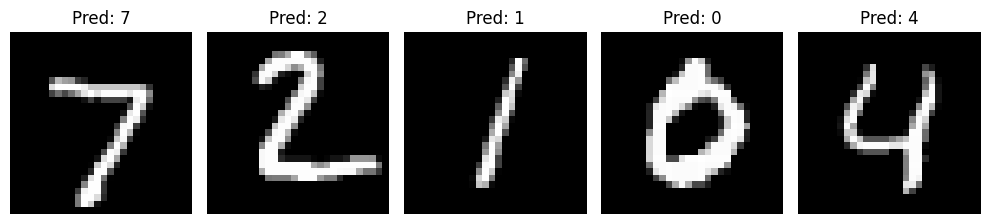

In [ ]:
# Visualize 5 predictions
pred_labels = np.argmax(val_pred, axis=1)
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {pred_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()